# LETS GROW MORE VIP INTERNSHIP

# prediction using decison tree 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df =pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#spilt into 3 parts to visualize the data

In [9]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

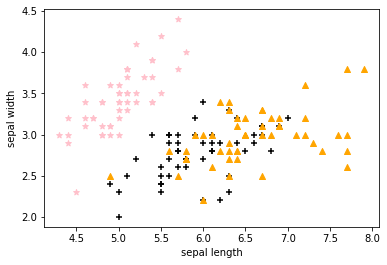

In [10]:
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='pink', marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='black', marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='orange', marker='^')

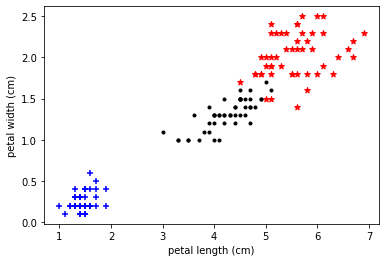

In [11]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='black', marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red', marker='*')

In [12]:
#Train and test data spiliting

In [13]:
X = df.drop(['target','flower_name'],axis='columns')
Y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
#DECISION TREE 

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [17]:
#train the model

In [18]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
y_predict = model.predict(X_test) 

In [20]:
from sklearn.metrics import confusion_matrix
cn =confusion_matrix(Y_test,y_predict)
cn

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Text(0.4, 0.9166666666666666, 'petal length(cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 39, 41]\nclass = virginica'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'petal length(cm) <= 4.95\ngini = 0.5\nsamples = 80\nvalue = [0, 39, 41]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'petal width (cm) <= 1.65\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal width(cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5833333333333334, 'petal width (cm) <= 1.7\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.7, 0.4166666666666667, 'p

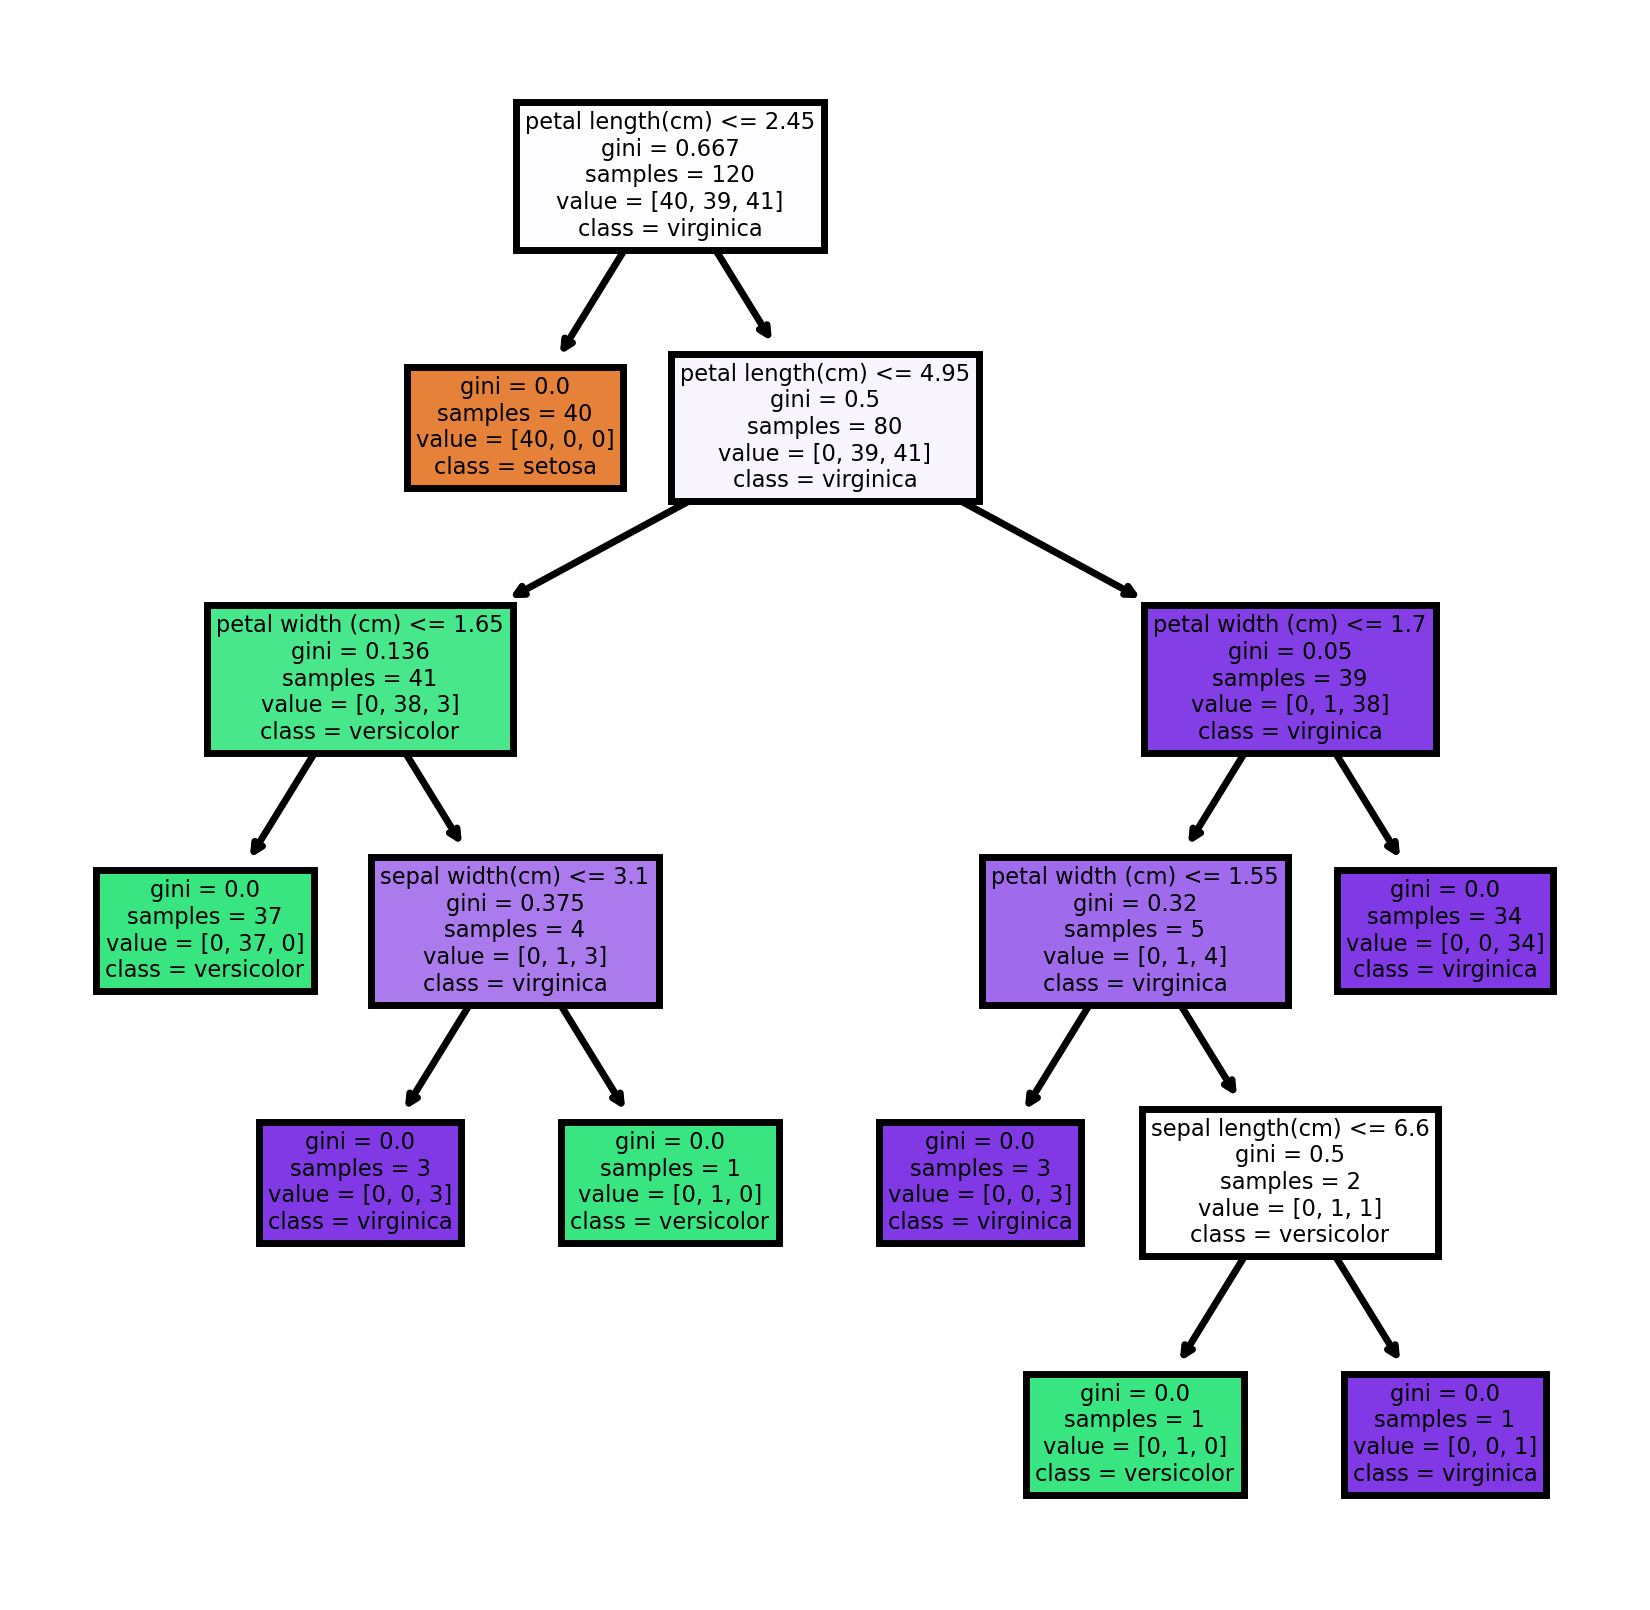

In [22]:
function_name = ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width (cm)']
class_name = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4),dpi=500)
tree.plot_tree(model, feature_names = function_name, class_names = class_name, filled = True)